Homework week 7 DS-002
Predict the classes of flowers
by using K-means and Hierarchical Clustering methods.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
#import matplotlib.cm as cm
from matplotlib.colors import ListedColormap


import warnings 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, normalize

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering


from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
cols = df.columns
df.columns = [col.lower() for col in cols]

In [5]:
cols

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
df.rename(columns={'sepallengthcm' : 'sepal_length', 
                    'sepalwidthcm' : 'sepal_width',
                  'petallengthcm' : 'petal_length',
                  'petalwidthcm' : 'petal_width'},
                   inplace=True)

In [7]:
df

,id,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
df.drop(['id'], axis=1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
df.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
x = df.iloc[:,1:5]
y = df.iloc[:,-1]

In [11]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

scaler.fit(x)
x_scaled_array = scaler.transform(x)
x_scaled = pd.DataFrame(x_scaled_array, columns = x.columns)

x_scaled.sample(5)

,sepal_length,sepal_width,petal_length,petal_width
113,-0.173674,-1.281972,0.705893,1.053537
102,1.522676,-0.124958,1.217684,1.185010
57,-1.143017,-1.513375,-0.260824,-0.261193
92,-0.052506,-1.050569,0.137236,0.001753
128,0.674501,-0.587764,1.047087,1.185010


In [12]:
iris_setosa=df.loc[df["species"]=="Iris-setosa"]
iris_virginica=df.loc[df["species"]=="Iris-virginica"]
iris_versicolor=df.loc[df["species"]=="Iris-versicolor"]

<Axes: >

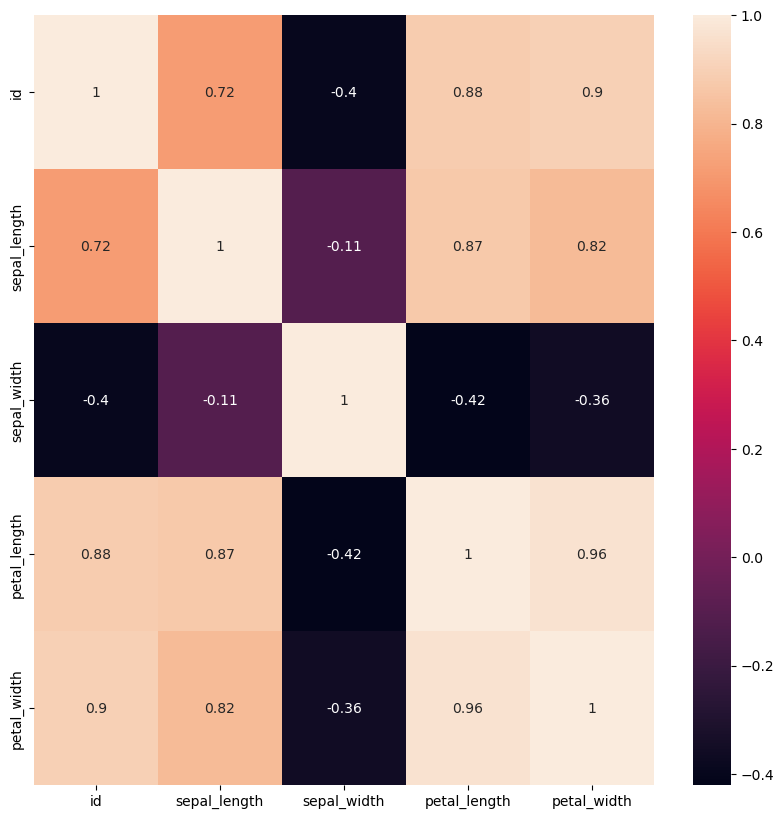

In [13]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(),annot = True)

In [14]:
df.isnull().sum().sum()

0

In [15]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [16]:
df.describe()

,id,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


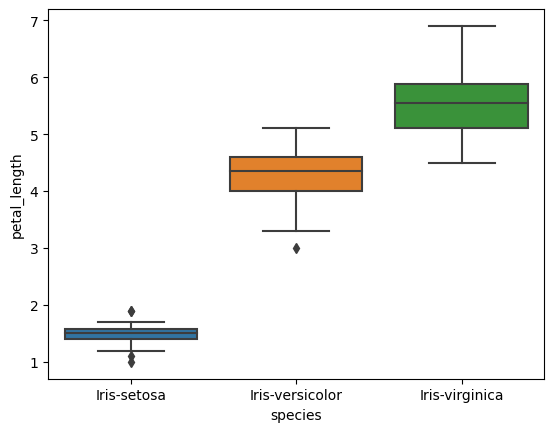

In [17]:
sns.boxplot(x="species",y="petal_length",data=df)
plt.show()

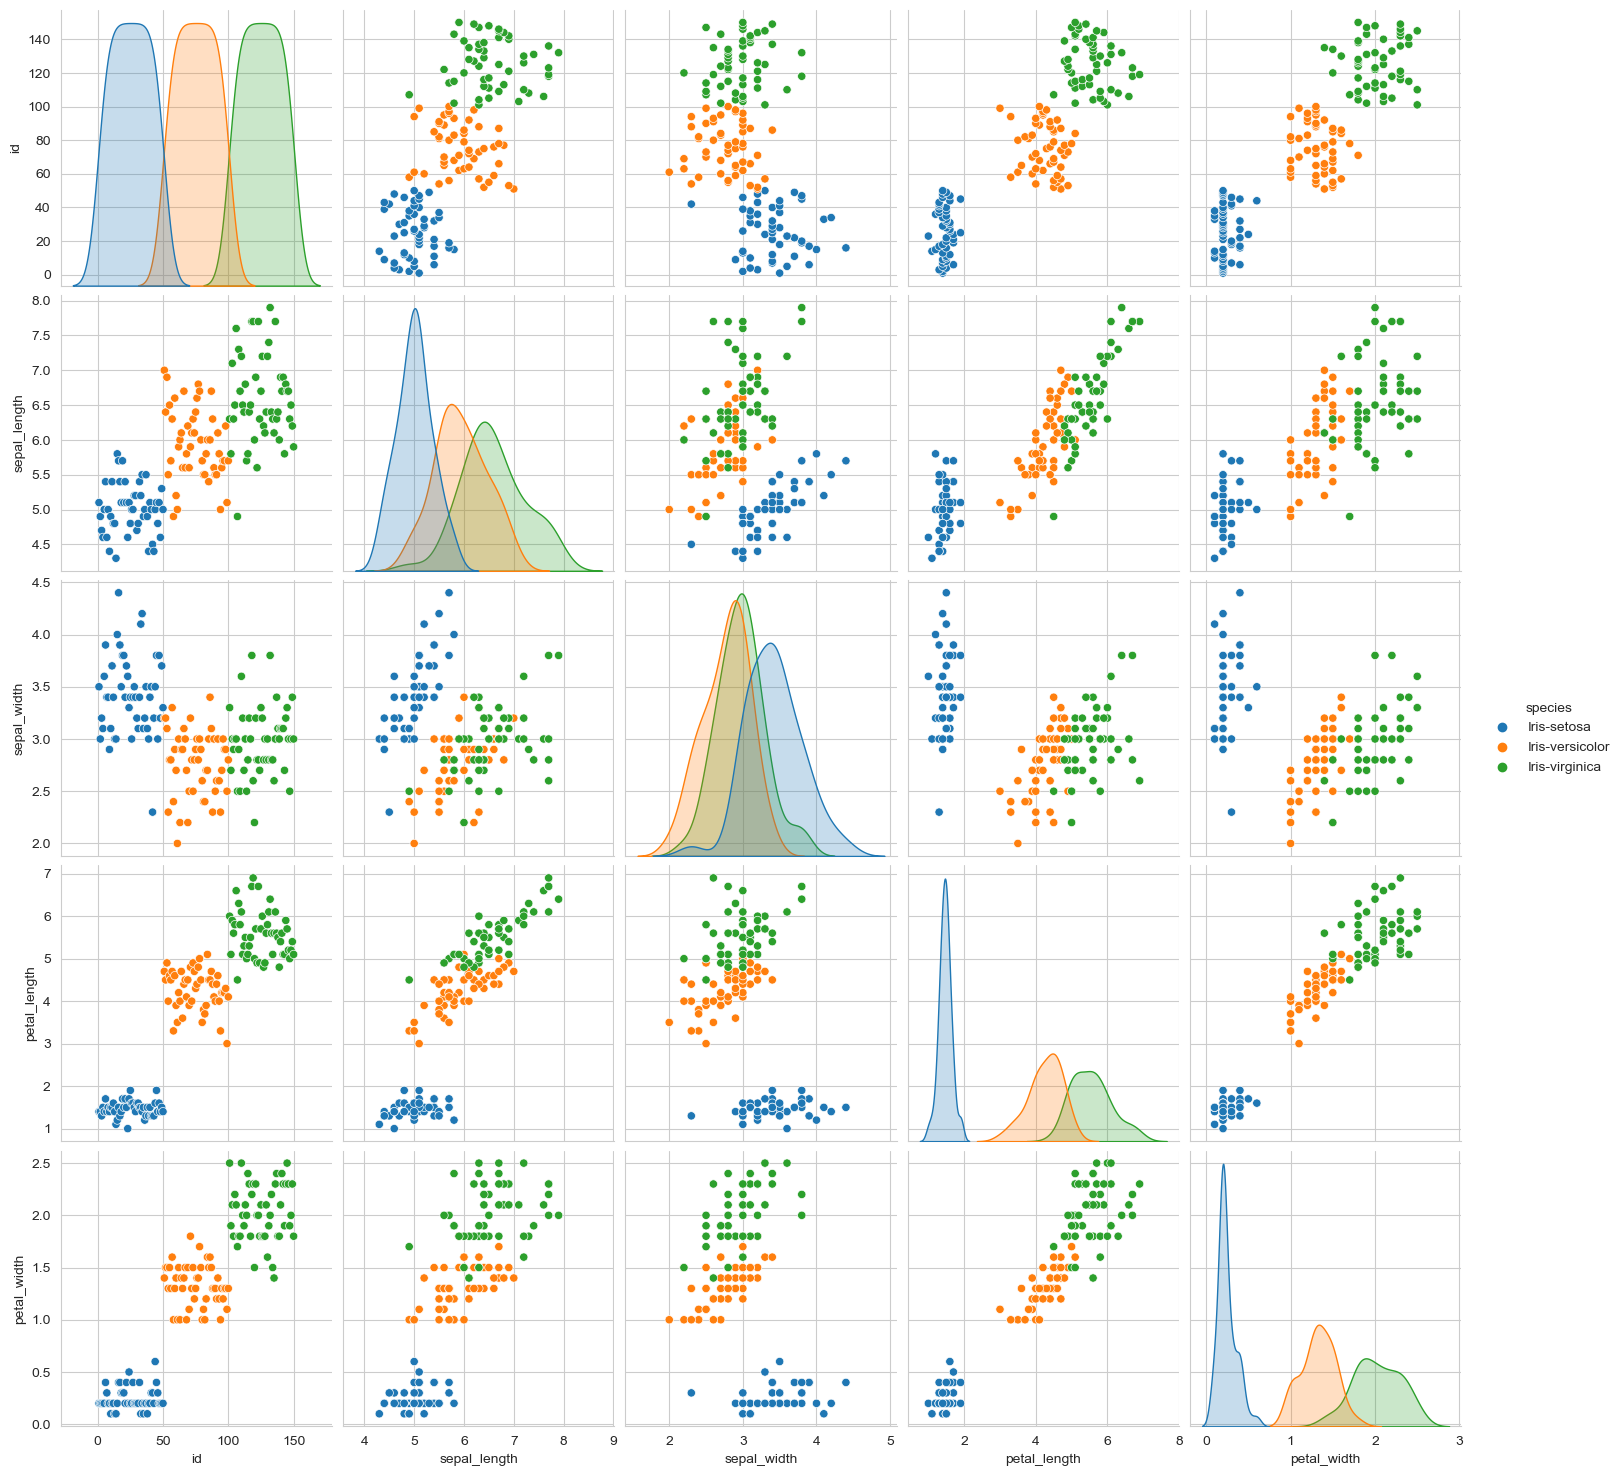

In [18]:
sns.set_style("whitegrid")
sns.pairplot(df,hue="species",size=3);
plt.show()

In [19]:
x=df.iloc[:,[0,1,2,3]].values

In [20]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

Elbow method

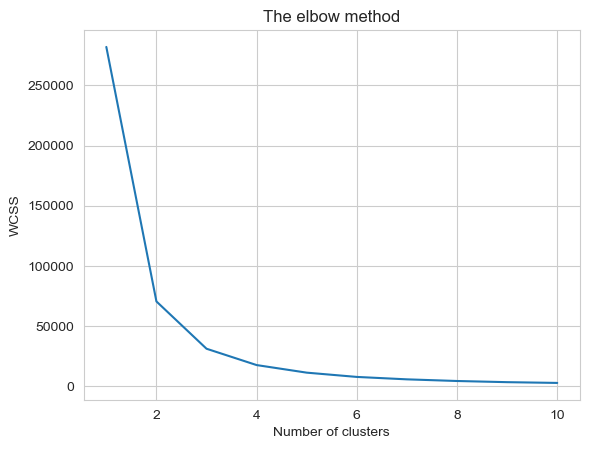

In [21]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

Silhuette method

In [23]:
range_n_clusters = [2, 3, 4, 5, 6,7,8]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(x)
    silhouette_avg = silhouette_score(x, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.6205786765196579
For n_clusters = 3 The average silhouette_score is : 0.5820898597618552
For n_clusters = 4 The average silhouette_score is : 0.5568074891817114
For n_clusters = 5 The average silhouette_score is : 0.5412981836374051
For n_clusters = 6 The average silhouette_score is : 0.533360427144515
For n_clusters = 7 The average silhouette_score is : 0.5197289585507838
For n_clusters = 8 The average silhouette_score is : 0.510299868720925


In [24]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x)

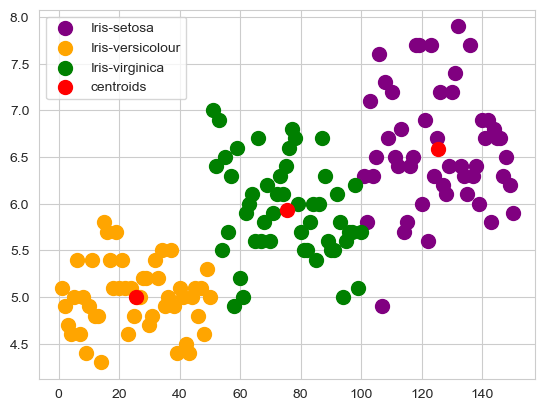

In [25]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'centroids')

plt.legend()

Hierarchical Clustering

In [26]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

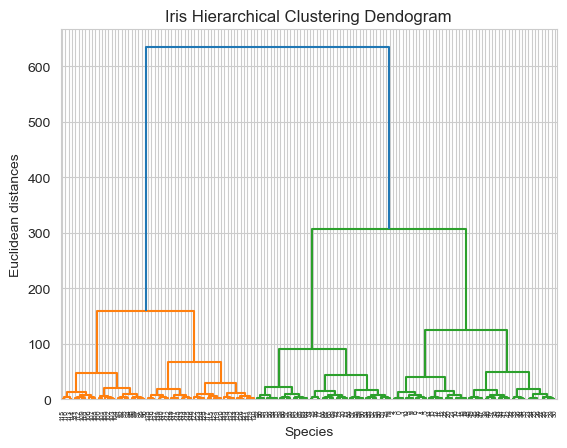

In [27]:
dendogram=sch.dendrogram(sch.linkage(x,method='ward')) # Within cluster variance is reduced with ward method
plt.title('Iris Hierarchical Clustering Dendogram')
plt.xlabel('Species')
plt.ylabel('Euclidean distances')
plt.show()

In [28]:
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(x)

In [29]:
y_hc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

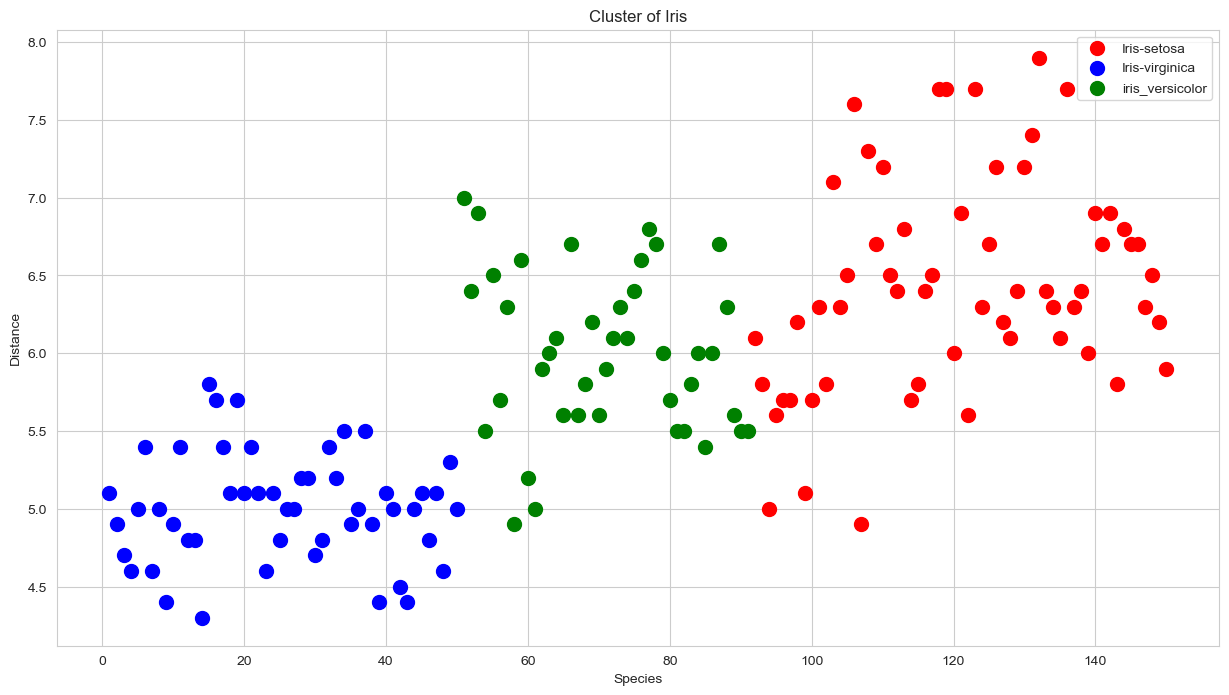

In [32]:
fig = plt.figure(figsize = (15,8))
plt.scatter(x[y_hc==0,0],x[y_hc==0,1],s=100,c='red',label='Iris-setosa')
plt.scatter(x[y_hc==1,0],x[y_hc==1,1],s=100,c='blue',label='Iris-virginica')
plt.scatter(x[y_hc==2,0],x[y_hc==2,1],s=100,c='green',label='iris_versicolor')
plt.title('Cluster of Iris')
plt.xlabel('Species')
plt.ylabel('Distance')
plt.legend()
plt.ioff()
plt.show()